# Exercise 6

## Question 1

We will implement its variant called k-medoids.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.datasets import make_blobs

np.random.seed(42)

%matplotlib inline

def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

### TODO

Complete the method `choose_centroids` below. Specifically:  

*  `choose_centroids(X, labels, num_clusters)` choose a new centroid from the data points in a cluster. The new centroid is the data point that has the lowest sum of distances to other points in the cluster (recall that assignment is represented by the `labels` array).


In [2]:
def choose_centroids(X, labels, num_clusters):
    """Calculate the medoid of all objects in each cluster."""
    medoids = []
    for i in range(num_clusters):
        indices = list(np.array(np.where(labels == i)).flatten())
        elems = np.array(X)[indices]
        medoid = np.array([np.array([euclidean_distance(e, f) for f in elems if (f != e).all()]).sum(axis=0) for e in elems]).argmin()
        medoids.append(elems[medoid])
    return np.array(medoids)

In [3]:
def gen_data(num_samples, num_blobs=3, random_state=42):
    """Generate random 2D data points"""
    X, y = make_blobs(n_samples=num_samples, random_state=random_state,
        centers=num_blobs, cluster_std=5.0)
    return X, y

def init_centroids(X,num_clusters):
    """Compute euclidean distance between a point and a centroid.
    point,centroid: 1D Numpy array containing coordinates [x,y]
    """
    rand_indices = np.random.choice(X.shape[0], num_clusters, replace=False)
    return X[rand_indices, :]

def assign_points(X, centroids):
    """Assign objects to their closest cluster center according to
    the Euclidean distance function."""
    labels = []
    for point in range(0, X.shape[0]):
        distance = {}
        for centroid in range(0, centroids.shape[0]):
            distance[centroid] = euclidean_distance(X[point], centroids[centroid])
        
        index_of_minimum = min(distance, key=distance.get)
        labels.append(index_of_minimum)
    return np.array(labels)
    
def k_medoids(X, num_clusters):
    # Initialize centroids to randomly chosen data points
    centroids = init_centroids(X, num_clusters)

    # Bookkeeping
    num_iter = 0
    positions = [centroids]
    
    while True:
        labels = assign_points(X, centroids)
        new_centroids = choose_centroids(X, labels, num_clusters)
        num_iter += 1
        
        # Termination criterion
        if np.all(centroids == new_centroids):
            break
            
        centroids = new_centroids
        positions.append(centroids)
    return [labels, centroids, num_iter, positions]

In [4]:
num_samples = 150
num_blobs = 3
X, y = gen_data(num_samples, num_blobs=num_blobs)

total_iterations = 10
num_clusters = 3

[cluster_label, new_centroids, num_iter, positions] = k_medoids(X, num_clusters)
print("Convergence in %i iteration(s)" % num_iter)

Convergence in 4 iteration(s)


### Plotting

Cluster centroids are displayed as red circles. Their positions across the various steps of the optimization are displayed as red lines. Data points are colored according to their cluster assignement.

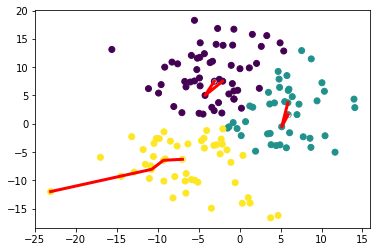

In [5]:
_ = plt.scatter(X[:, 0], X[:, 1], c=cluster_label)
_ = plt.scatter(new_centroids[:,0], new_centroids[:,1], marker='o', s=5, c='r', edgecolors='w', linewidths=2)

plt.plot(np.array(positions)[:,0,0],np.array(positions)[:,0,1],'r',linewidth=3)
plt.plot(np.array(positions)[:,1,0],np.array(positions)[:,1,1],'r',linewidth=3)
plt.plot(np.array(positions)[:,2,0],np.array(positions)[:,2,1],'r',linewidth=3)

## Question 2

Complete the following method to compute the modularity measure of a graph.

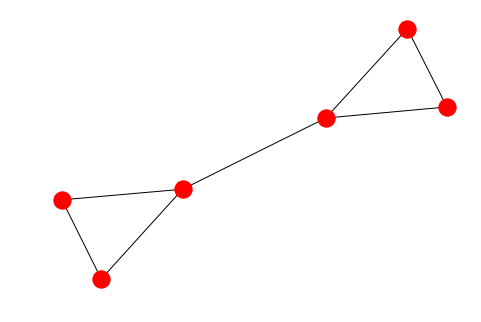

In [73]:
import networkx as nx
import numpy as np

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw(G)

#G = nx.karate_club_graph()
#nx.draw(G)

In [74]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1
G.degree[2]
len(G.edges)

7

In [60]:
## If you haven't installed networkx package, you can run the following command (note the exclamation mark)
## !conda install networkx --yes 

In [75]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    m = len(G.edges)
    Q = 0
    #TODO
    return Q/(2*m)

In [76]:
compute_modularity(G)

0.7857142857142854

## Pen and Paper

Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

#### Question

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.